# Introduction to neural networks with tensorflow 

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.

A few types of classification problems:
 - Binary Classification
 - Multiclass Classification
 - Multilabel Classification

## Creating data for view and fit

In [1]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create cricles
X , y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [2]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
# Check the labels
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

Our data is a little bit hard to understand right now.. Let's visualize it..

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y}) 
# 0 means 0th axis of X and 1 means 1th axis of X
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


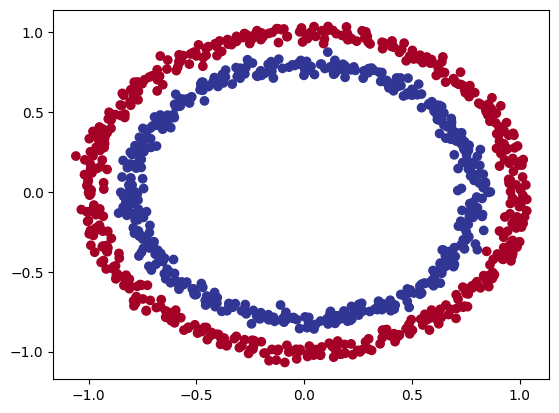

In [5]:
# Visualize with plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Input shapes and output shapes

In [6]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples ar eworking with
len(X), len(y)

(1000, 1000)

In [8]:
# View any example of features and labels
X[500], y[500]

(array([-0.59607767,  0.61158345]), 1)

## Steps in modelling

In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

 1. **Creating a model** - piece together the layers of a neural network yourself (using the functional or sequential API) or import a previously built model (known as transfer learning).
 2. **Compiling a model** - defining how a model's performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
 3. **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

In [9]:
import tensorflow as tf

In [10]:
 # Set random seed
tf.random.set_seed(42)

 # 1. Create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
 ])

 # 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 6ms/step - loss: 5.3622 - accuracy: 0.4790
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 4.4981 - accuracy: 0.4650
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 3.8667 - accuracy: 0.4770
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 1.0788 - accuracy: 0.4940
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7237 - accuracy: 0.4990


In [11]:
# Let;s try and improve ur mode by training for longer
model_1.fit(X, y, epochs=200 ,verbose=0) # Always fit training data
model_1.evaluate(X, y) # Always evaluate testing data

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we are working on a classification model and our model is working around ~50% accuracy.. it's performing as if is guessing. <br> So let's step up things up a notch an add a extra layer.

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile our model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_2.fit(X, y, epochs=100, verbose=0)

In [13]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934921741485596, 0.5]

### Improving our Model

Let's Look into our bag of tricks

To improve our model, we can alter almost every part of the 3 steps we went through before.

 - **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
 - **Compiling a model** - you might want to choose a different optimization function (such as the Adam optimizer, which is usually pretty good for many problems) or perhaps change the learning rate of the optimization function.
 - **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer).

In [14]:
circles['label'].value_counts()

1    500
0    500
Name: label, dtype: int64

In [15]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
# Evlaute the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.5070


[0.6961066722869873, 0.5070000290870667]

### Visualize, Visualize, Visualize

In [17]:
model_3.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[0.49278444],
       [0.53196746],
       [0.5347247 ],
       [0.55009705],
       [0.44209826],
       [0.55169165],
       [0.54503554],
       [0.48786393],
       [0.46509525],
       [0.55965996],
       [0.4918461 ],
       [0.53050154],
       [0.5495036 ],
       [0.4635156 ],
       [0.4538996 ],
       [0.45637164],
       [0.5108981 ],
       [0.45718792],
       [0.52029455],
       [0.4811958 ],
       [0.50799197],
       [0.563435  ],
       [0.45012826],
       [0.4956781 ],
       [0.5524205 ],
       [0.53959495],
       [0.5457479 ],
       [0.47037715],
       [0.45415935],
       [0.458727  ],
       [0.46342146],
       [0.5610923 ],
       [0.54335815],
       [0.47401708],
       [0.4483066 ],
       [0.56112266],
       [0.5486391 ],
       [0.5270754 ],
       [0.45528117],
       [0.5147032 ],
       [0.47839305],
       [0.5413464 ],
       [0.48676172],
       [0.4655252 ],
       [0.49535704],
       [0.5097866 ],
       [0.4499947 ],
       [0.536

To visualize our model's prediction, let's create function `plot_decision_boundary()`, this function will:

 - Takes in a trained model, features (X) and labels (y).
 - Creates a meshgrid of the different X values.
 - Makes predictions across the meshgrid.
 - Plots the predictions as well as a line between the different zones (where each unique class falls).

In [18]:
import numpy as np

In [19]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function was insprired by two resources:
   1. https://cs231n.github.io/neural-networks-case-study/
   2. https://github.com/GokuMohandas/Made-With-ML
  """
  # Define the axis boundary of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X value(we're going to make prediction on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]  # stack 2D array together

  # Make prediction
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshapre our prediction to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification") 
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the desicion boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 0s 1ms/step
doing binary classification


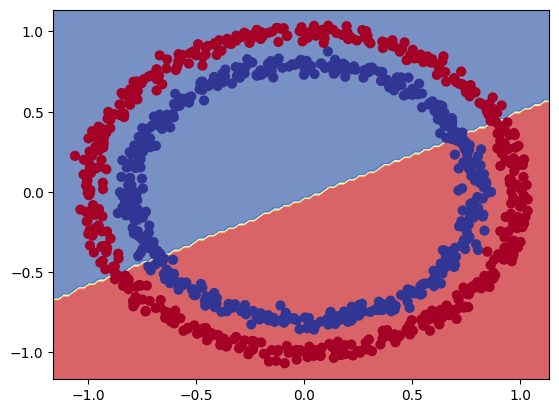

In [20]:
# Check out the prediction  our model is making
plot_decision_boundary(model=model_3,
                       X=X,
                       y=y)

In [21]:
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

x_min, x_max, y_min, y_max

(-1.1595024599098636,
 1.1337117525463374,
 -1.1677683182718437,
 1.1360036756154805)

### Changing the model by a bit

In [22]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_4.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.3299 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2957 - accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2741 - accuracy: 0.4900
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2454 - accuracy: 0.4600
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2241 - accuracy: 0.4350
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2162 - accuracy: 0.4230
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2108 - accuracy: 0.4140
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2064 - accuracy: 0.4070
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2032 - accuracy: 0.4130
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2005 - accuracy: 0.4180
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


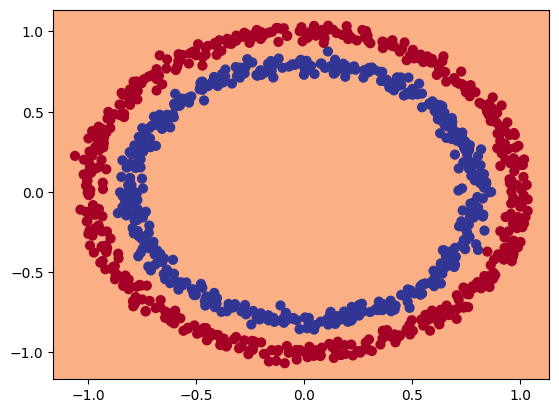

In [23]:
plot_decision_boundary(model_4, X, y)

Let's try to build our first neural network with a non-linear activation function.

In [24]:
# New model

# Set random seed
tf.random.set_seed(42)

# Create a model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model
model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=["accuracy"])

# Fit the model
model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 5.3838 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 5.3321 - accuracy: 0.4800
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2996 - accuracy: 0.4800
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2526 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 5.2104 - accuracy: 0.4760
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 5.1482 - accuracy: 0.4760
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 5.0565 - accuracy: 0.4740
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 4.9282 - accuracy: 0.4720
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 4.8233 - accuracy: 0.4720
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 4.7384 - accuracy: 0.4680
Epoch 11/

313/313 [==============================] - 0s 1ms/step
doing binary classification


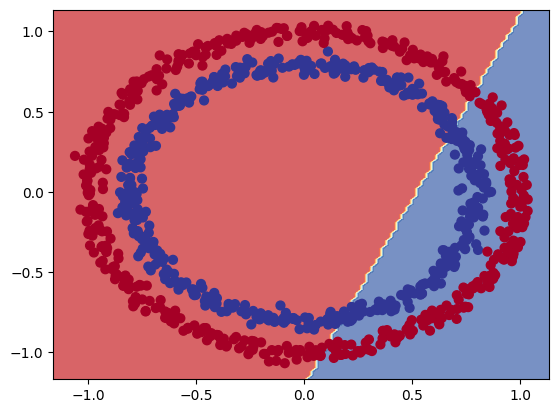

In [25]:
# Plot the predictions
plot_decision_boundary(model_5, X, y)

### Time to repilcate the multi-layer neural-network from the Tensorflow playground

In [26]:
# Set the random seed
tf.random.set_seed(42)

# 1 Create the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu')
])

# 2. Compile the model
model_6.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_6 = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 4.2683 - accuracy: 0.2970
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0031 - accuracy: 0.2730
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8318 - accuracy: 0.2470
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5139 - accuracy: 0.2330
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2386 - accuracy: 0.2240
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.0973 - accuracy: 0.2180
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 2.9159 - accuracy: 0.2030
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 2.8290 - accuracy: 0.2000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7880 - accuracy: 0.1990
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 2.7405 - accuracy: 0.2010
Epoch 11/

In [27]:
# Evaluate the model
model_6.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.7952 - accuracy: 0.2770


[0.795228123664856, 0.2770000100135803]

313/313 [==============================] - 0s 1ms/step
doing multiclass classification


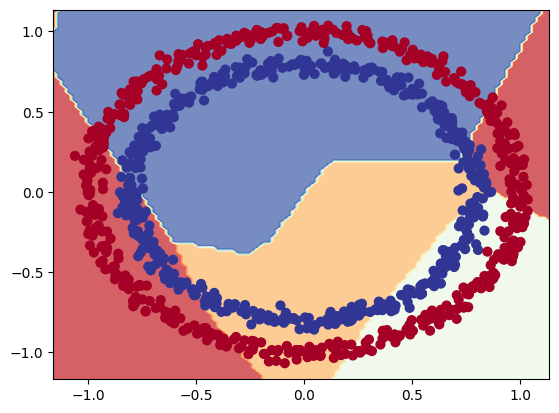

In [28]:
# How do our model predictions look
plot_decision_boundary(model_6, X, y)

### Once and for all Model

In [29]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model
model_7.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history_7 = model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6938 - accuracy: 0.5050
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6907 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5200
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6843 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6821 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6792 - accuracy: 0.5010
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6768 - accuracy: 0.5010
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.5140
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5020
Epoch 11/

In [30]:
# Evaluate the model
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 1.0000


[0.011547832749783993, 1.0]

313/313 [==============================] - 0s 1ms/step
doing binary classification


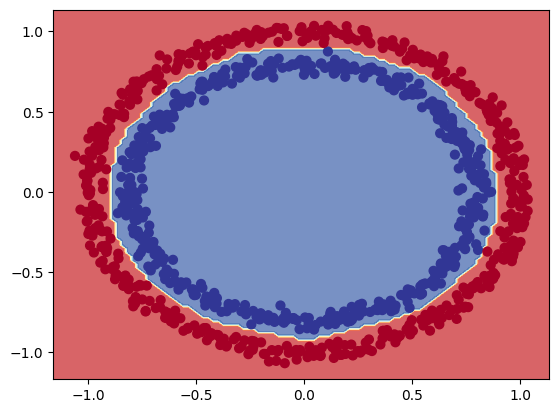

In [31]:
# Let's visualize the model
plot_decision_boundary(model_7, X, y)

In [32]:
model_7.predict(X)

32/32 [==============================] - 0s 1ms/step


array([[9.98595297e-01],
       [9.99600768e-01],
       [9.84753847e-01],
       [9.96306896e-01],
       [1.85440143e-03],
       [9.78982389e-01],
       [9.95139122e-01],
       [9.98637319e-01],
       [9.91002679e-01],
       [3.62269260e-04],
       [9.54032719e-01],
       [1.99837168e-03],
       [9.70520258e-01],
       [9.97881949e-01],
       [9.56121147e-01],
       [9.97360766e-01],
       [3.45023465e-03],
       [9.97201085e-01],
       [9.86965120e-01],
       [7.81594496e-03],
       [9.98713195e-01],
       [4.80183051e-04],
       [5.30413585e-03],
       [9.98413444e-01],
       [9.18453443e-04],
       [2.41888184e-02],
       [8.12358921e-04],
       [9.79784191e-01],
       [9.86694157e-01],
       [9.94078815e-01],
       [2.48746946e-02],
       [7.84712669e-04],
       [9.98558044e-01],
       [1.20698113e-03],
       [7.43372148e-05],
       [1.37210780e-04],
       [9.96740997e-01],
       [9.75136697e-01],
       [9.96291757e-01],
       [6.66024396e-03],
